In [16]:
!pip install -r requirements.txt



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [20]:
!ls data/

clean_test.csv		      postcode_intelligence.db
ebay_completed_listings.csv   test_autotrader_deep.csv
ford_transit_uk_complete.csv  test_ebay_scrape.csv


In [22]:
df = pd.read_csv('./data/ebay_completed_listings.csv')


In [23]:
df.shape

(124, 17)

In [24]:
df.dropna()


,title,year,mileage,price,price_text,condition,location,postcode,shipping,listing_type,sold_date,bids,seller,url,image_url,scraped_at,proxy_used


<Axes: >

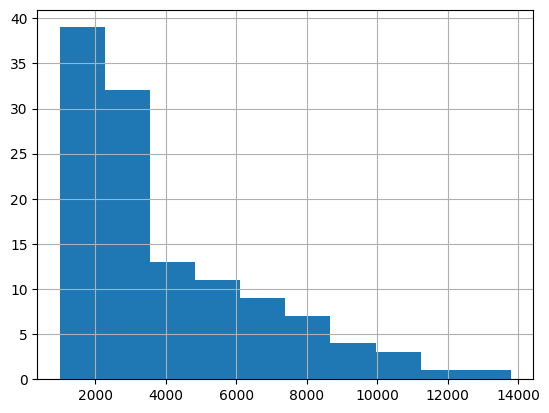

In [25]:
df.price.hist()


LinAlgError: SVD did not converge in Linear Least Squares

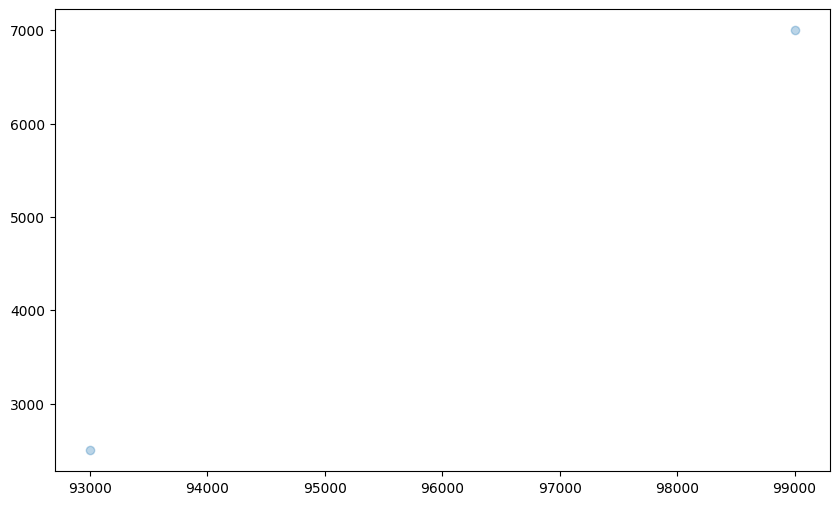

In [26]:
#plote price vs mileage ad polynomial fit line

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.mileage, df.price, alpha=0.3)

fit = np.polyfit(df.mileage, df.price, 2)

ax.plot(df.mileage, fit[0] * df.mileage + fit[1], 'r-', alpha=0.3)


ax.set_xlabel('Mileage')
ax.set_ylabel('Price')
plt.show()


In [27]:
import pprint
summary_data ={
    'median': df.mileage.median(),
    'iqr': df.mileage.quantile(0.75) - df.mileage.quantile(0.25),
    'iqr_lower': df.mileage.quantile(0.25) - 1.5 * (df.mileage.quantile(0.75) - df.mileage.quantile(0.25)),
    'iqr_upper': df.mileage.quantile(0.75) + 1.5 * (df.mileage.quantile(0.75) - df.mileage.quantile(0.25)),
    'min': df.mileage.min(),
    'max': df.mileage.max(),
    'mean': df.mileage.mean(),
    'std': df.mileage.std()
}

summary_data = {k: float(v.round(2)) for k, v in summary_data.items()}

pprint.pprint(summary_data, width=40)


{'iqr': 3000.0,
 'iqr_lower': 90000.0,
 'iqr_upper': 102000.0,
 'max': 99000.0,
 'mean': 96000.0,
 'median': 96000.0,
 'min': 93000.0,
 'std': 4242.64}


In [28]:
import pprint
summary_data ={
    'median': df.age.median(),
    'iqr': df.age.quantile(0.75) - df.age.quantile(0.25),
    'iqr_lower': df.age.quantile(0.25) - 1.5 * (df.age.quantile(0.75) - df.age.quantile(0.25)),
    'iqr_upper': df.age.quantile(0.75) + 1.5 * (df.age.quantile(0.75) - df.age.quantile(0.25)),
    'min': df.age.min(),
    'max': df.age.max(),
    'mean': df.age.mean(),
    'std': df.age.std()
}

summary_data = {k: float(v.round(2)) for k, v in summary_data.items()}

pprint.pprint(summary_data, width=40)


AttributeError: 'DataFrame' object has no attribute 'age'

In [10]:
import pprint
summary_data ={
    'median': df.price.median(),
    'iqr': df.price.quantile(0.75) - df.price.quantile(0.25),
    'iqr_lower': df.price.quantile(0.25) - 1.5 * (df.price.quantile(0.75) - df.price.quantile(0.25)),
    'iqr_upper': df.price.quantile(0.75) + 1.5 * (df.price.quantile(0.75) - df.price.quantile(0.25)),
    'min': df.price.min(),
    'max': df.price.max(),
    'mean': df.price.mean(),
    'std': df.price.std()
}

summary_data = {k: float(v.round(2)) for k, v in summary_data.items()}

pprint.pprint(summary_data, width=40)


{'iqr': 17401.0,
 'iqr_lower': -17102.5,
 'iqr_upper': 52501.5,
 'max': 67200.0,
 'mean': 18087.84,
 'median': 14995.0,
 'min': 1000.0,
 'std': 11068.07}


Multiple Linear Regression Results:
R² Score: 0.574
RMSE: £5,514
Coefficients:
  Mileage: £-0.07 per mile
  Age: £-1318.76 per year
  Intercept: £26,552


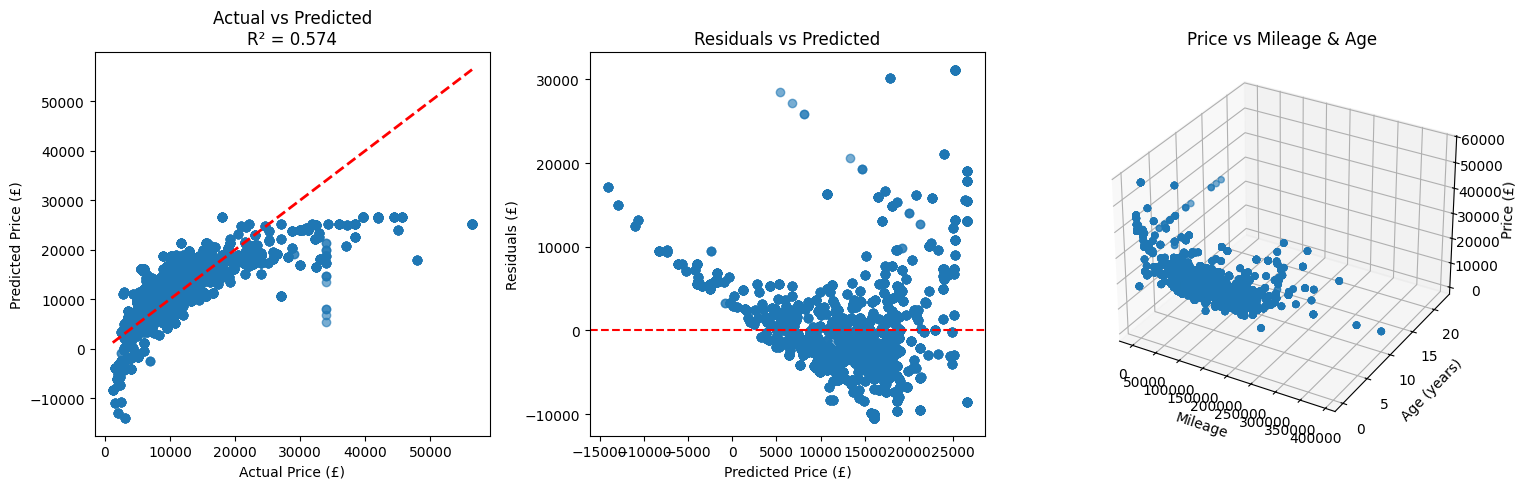


Example predictions:
50,000 miles, 5 years old: £16,615
100,000 miles, 8 years old: £9,315


In [11]:
# Multiple linear regression with mileage and age as inputs, price as output
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Prepare the data - remove rows with missing values
df_clean = df.dropna(subset=['mileage', 'age', 'price'])

# Features (X) - mileage and age as a 2D array
X = df_clean[['mileage', 'age']].values

# Target (y) - price  
y = df_clean['price'].values

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print model performance
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Multiple Linear Regression Results:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: £{rmse:,.0f}")
print(f"Coefficients:")
print(f"  Mileage: £{model.coef_[0]:.2f} per mile")
print(f"  Age: £{model.coef_[1]:.2f} per year")
print(f"  Intercept: £{model.intercept_:,.0f}")

# Create visualization
fig = plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted prices
ax1 = fig.add_subplot(131)
ax1.scatter(y, y_pred, alpha=0.6)
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Price (£)')
ax1.set_ylabel('Predicted Price (£)')
ax1.set_title(f'Actual vs Predicted\nR² = {r2:.3f}')

# Plot 2: Residuals vs Predicted
ax2 = fig.add_subplot(132)
residuals = y - y_pred
ax2.scatter(y_pred, residuals, alpha=0.6)
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicted Price (£)')
ax2.set_ylabel('Residuals (£)')
ax2.set_title('Residuals vs Predicted')

# Plot 3: 3D visualization (optional)
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_clean.mileage, df_clean.age, df_clean.price, alpha=0.6)
ax3.set_xlabel('Mileage')
ax3.set_ylabel('Age (years)')
ax3.set_zlabel('Price (£)')
ax3.set_title('Price vs Mileage & Age')

plt.tight_layout()
plt.show()

# Optional: Create a function to predict price for new data
def predict_price(mileage, age):
    """Predict price given mileage and age"""
    return model.predict([[mileage, age]])[0]

# Example prediction
print(f"\nExample predictions:")
print(f"50,000 miles, 5 years old: £{predict_price(50000, 5):,.0f}")
print(f"100,000 miles, 8 years old: £{predict_price(100000, 8):,.0f}")
